# Collecting Data From NBA API

In [24]:
# Import Libraries
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

ModuleNotFoundError: No module named 'nba_api'

In [ ]:
# Get Player IDs of all Players

all_players = players.get_active_players()

print(all_players)

[{'id': 1630173, 'full_name': 'Precious Achiuwa', 'first_name': 'Precious', 'last_name': 'Achiuwa', 'is_active': True}, {'id': 203500, 'full_name': 'Steven Adams', 'first_name': 'Steven', 'last_name': 'Adams', 'is_active': True}, {'id': 1628389, 'full_name': 'Bam Adebayo', 'first_name': 'Bam', 'last_name': 'Adebayo', 'is_active': True}, {'id': 1630534, 'full_name': 'Ochai Agbaji', 'first_name': 'Ochai', 'last_name': 'Agbaji', 'is_active': True}, {'id': 1630583, 'full_name': 'Santi Aldama', 'first_name': 'Santi', 'last_name': 'Aldama', 'is_active': True}, {'id': 1641725, 'full_name': 'Trey Alexander', 'first_name': 'Trey', 'last_name': 'Alexander', 'is_active': True}, {'id': 1629638, 'full_name': 'Nickeil Alexander-Walker', 'first_name': 'Nickeil', 'last_name': 'Alexander-Walker', 'is_active': True}, {'id': 1628960, 'full_name': 'Grayson Allen', 'first_name': 'Grayson', 'last_name': 'Allen', 'is_active': True}, {'id': 1628386, 'full_name': 'Jarrett Allen', 'first_name': 'Jarrett', 'last

In [ ]:
# Get the career avg data of all players

df = pd.DataFrame()
iteration = 1

for player in all_players:
    try:
        print(f'Iteration: {iteration}')
        player_id = player.get('id', None)

        time.sleep(2)
    
        if player_id is not None:
            player_object = playercareerstats.PlayerCareerStats(per_mode36= 'PerGame', player_id= str(player_id))
            df_player = player_object.get_data_frames()[0]
            df = pd.concat([df, df_player])
    
    except KeyError as e: print(f'Skipping Player ID: {player_id}')
    except Exception as e: print(f'Trouble getting player {player_id}')

    iteration += 1
 
df
df.to_csv('../Datasets/nba.csv')

In [ ]:
# Get the career total data of all players

df_totals = pd.DataFrame()
failed_totals = []
iteration = 1

for player in all_players:
    try:
        print(f'Iteration: {iteration}')
        player_id = player.get('id', None)

        time.sleep(2)
    
        if player_id is not None:
            player_object = playercareerstats.PlayerCareerStats(per_mode36= 'Totals', player_id= str(player_id))
            df_player = player_object.get_data_frames()[0]
            df_totals = pd.concat([df_totals, df_player])
    
    except KeyError as e: 
        print(f'Skipping Player ID: {player_id}')
        failed_totals.append(player_id)
    except Exception as e: 
        print(f'Trouble getting player {player_id}')
        failed_totals.append(player_id)

    iteration += 1
 
df_totals
df_totals.to_csv('../Datasets/nba_totals.csv')

In [ ]:
df = pd.read_csv('../Datasets/nba.csv')
df = df.drop(['Unnamed: 0'], axis= 1)
df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1630173,2020-21,0,1610612748,MIA,21.0,61,4,12.1,2.0,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,1630173,2021-22,0,1610612761,TOR,22.0,73,28,23.6,3.6,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,1630173,2022-23,0,1610612761,TOR,23.0,55,12,20.7,3.6,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
3,1630173,2023-24,0,1610612761,TOR,24.0,25,0,17.5,3.1,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
4,1630173,2023-24,0,1610612752,NYK,24.0,49,18,24.2,3.2,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6


In [ ]:
df_totals = pd.read_csv('../Datasets/nba_totals.csv')
df_totals = df_totals.drop('Unnamed: 0', axis = 1)
df_totals = df_totals.loc[:, ['PLAYER_ID', 'GP', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']]
df_totals = df_totals.groupby(['PLAYER_ID'], sort= False).sum()
df_totals['FG_PCT'] = np.round(df_totals['FGM'] / df_totals['FGA'], 3)
df_totals['3_PCT'] = np.round(df_totals['FG3M'] / df_totals['FG3A'], 3)
df_totals['FT_PCT'] = np.round(df_totals['FTM'] / df_totals['FTA'], 3)
df_totals = df_totals.drop(['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA'], axis = 1)
player_names = pd.Series([])

for i in df_totals.loc[:, 'REB':'PTS'].columns:
    df_totals[i] = np.round(df_totals[i] / df_totals['GP'], 1)

for dict in all_players:
    if dict.get('id') in df_totals.index:
        player_names = np.append(player_names, dict.get('full_name'))

df_totals['PLAYER_NAME'] = player_names

df_totals.to_csv("../Datasets/career_avgs.csv")

df_totals.head()

,GP,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT,PLAYER_NAME
PLAYER_ID,,,,,,,,,,,
1630173,394,5.8,1.0,0.6,0.7,1.0,7.6,0.488,0.297,0.608,Precious Achiuwa
203500,769,8.0,1.5,0.8,0.9,1.4,8.8,0.586,0.059,0.535,Steven Adams
1628389,573,8.9,3.6,1.1,0.9,2.2,15.8,0.535,0.317,0.758,Bam Adebayo
1630534,286,2.8,1.2,0.6,0.5,0.8,7.2,0.440,0.336,0.713,Ochai Agbaji
1630583,242,5.3,1.9,0.6,0.6,0.9,9.8,0.458,0.344,0.684,Santi Aldama


In [ ]:
df_totals.columns

Index(['GP', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'FG_PCT', '3_PCT',
       'FT_PCT', 'PLAYER_NAME'],
      dtype='object')

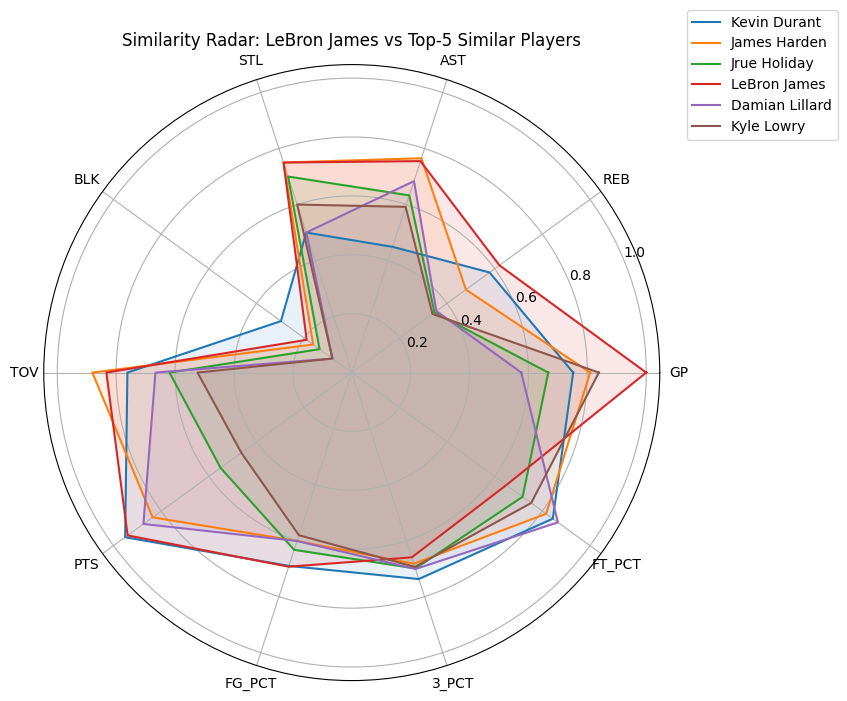

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def get_top_similar_players(df, target_player, stats, top_n=5):
    """
    Returns the top_n most similar players to target_player based on cosine similarity.
    """
    # Filter stats
    data = df[stats].copy()
    
    # Normalize stats manually (0-1 scale)
    data_norm = (data - data.min()) / (data.max() - data.min())
    
    # Get target player's vector
    target_vector = data_norm[df['PlayerName'] == target_player].values[0]
    
    # Compute similarity for all players
    sims = []
    for i, row in data_norm.iterrows():
        player_name = df.loc[i, 'PlayerName']
        if player_name == target_player:
            continue
        sim = cosine_similarity(target_vector, row.values)
        sims.append((player_name, sim))
    
    # Sort descending
    sims.sort(key=lambda x: x[1], reverse=True)
    
    # Return top-N players
    top_players = [player for player, score in sims[:top_n]]
    return top_players

def plot_similarity_radar(df, target_player, stats, top_n=5):
    """
    Plots radar chart for target player and top-N most similar players automatically.
    """
    top_players = get_top_similar_players(df, target_player, stats, top_n)
    
    # Include target player at the start
    players_to_plot = [target_player] + top_players
    
    # Normalize stats
    df_plot = df[df['PlayerName'].isin(players_to_plot)].copy()
    df_norm = df_plot.copy()
    for stat in stats:
        df_norm[stat] = (df_plot[stat] - df[stat].min()) / (df[stat].max() - df[stat].min())
    
    # Radar chart setup
    labels = stats
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))
    
    plt.figure(figsize=(8, 8))
    
    for i, row in df_norm.iterrows():
        values = row[stats].tolist()
        values += values[:1]
        plt.polar(angles, values, label=row['PlayerName'])
        plt.fill(angles, values, alpha=0.1)
    
    plt.xticks(angles[:-1], labels)
    plt.title(f"Similarity Radar: {target_player} vs Top-{top_n} Similar Players")
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.show()
# Load career averages dataset
df = pd.read_csv("../Datasets/career_avgs.csv")
df = df.rename(columns={"PLAYER_NAME": "PlayerName"})

# Choose numeric stats to use for comparison
stats = ["GP","REB","AST","STL","BLK","TOV","PTS","FG_PCT","3_PCT","FT_PCT"]
plot_similarity_radar(df, target_player="LeBron James", stats=stats, top_n=5)





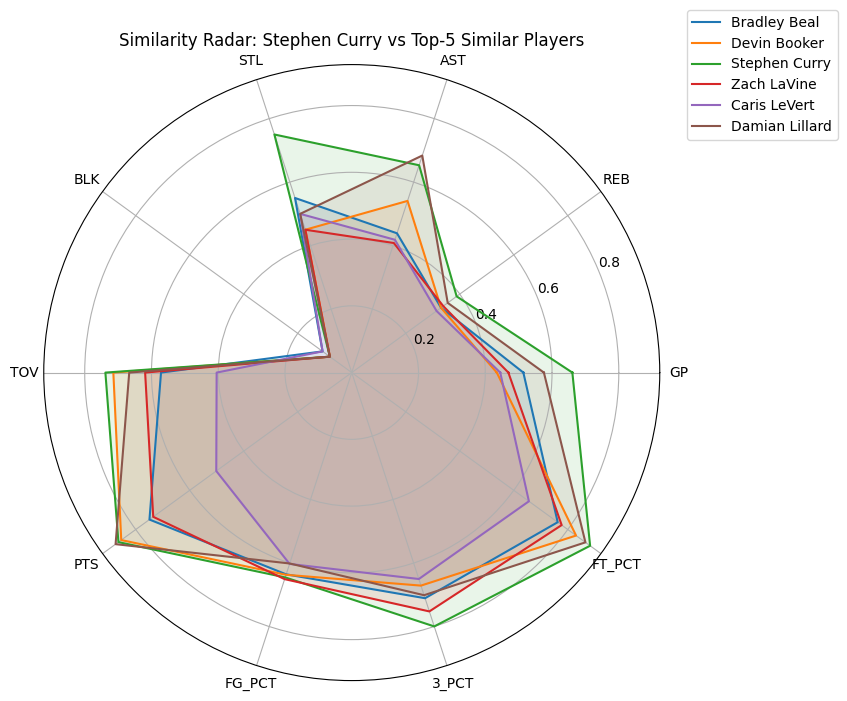

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def get_top_similar_players(df, target_player, stats, top_n=5):
    """
    Returns the top_n most similar players to target_player based on cosine similarity.
    """
    # Filter stats
    data = df[stats].copy()
    
    # Normalize stats manually (0-1 scale)
    data_norm = (data - data.min()) / (data.max() - data.min())
    
    # Get target player's vector
    target_vector = data_norm[df['PlayerName'] == target_player].values[0]
    
    # Compute similarity for all players
    sims = []
    for i, row in data_norm.iterrows():
        player_name = df.loc[i, 'PlayerName']
        if player_name == target_player:
            continue
        sim = cosine_similarity(target_vector, row.values)
        sims.append((player_name, sim))
    
    # Sort descending
    sims.sort(key=lambda x: x[1], reverse=True)
    
    # Return top-N players
    top_players = [player for player, score in sims[:top_n]]
    return top_players

def plot_similarity_radar(df, target_player, stats, top_n=5):
    """
    Plots radar chart for target player and top-N most similar players automatically.
    """
    top_players = get_top_similar_players(df, target_player, stats, top_n)
    
    # Include target player at the start
    players_to_plot = [target_player] + top_players
    
    # Normalize stats
    df_plot = df[df['PlayerName'].isin(players_to_plot)].copy()
    df_norm = df_plot.copy()
    for stat in stats:
        df_norm[stat] = (df_plot[stat] - df[stat].min()) / (df[stat].max() - df[stat].min())
    
    # Radar chart setup
    labels = stats
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))
    
    plt.figure(figsize=(8, 8))
    
    for i, row in df_norm.iterrows():
        values = row[stats].tolist()
        values += values[:1]
        plt.polar(angles, values, label=row['PlayerName'])
        plt.fill(angles, values, alpha=0.1)
    
    plt.xticks(angles[:-1], labels)
    plt.title(f"Similarity Radar: {target_player} vs Top-{top_n} Similar Players")
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.show()
# Load career averages dataset
df = pd.read_csv("../Datasets/career_avgs.csv")
df = df.rename(columns={"PLAYER_NAME": "PlayerName"})

# Choose numeric stats to use for comparison
stats = ["GP","REB","AST","STL","BLK","TOV","PTS","FG_PCT","3_PCT","FT_PCT"]
plot_similarity_radar(df, target_player="Stephen Curry", stats=stats, top_n=5)





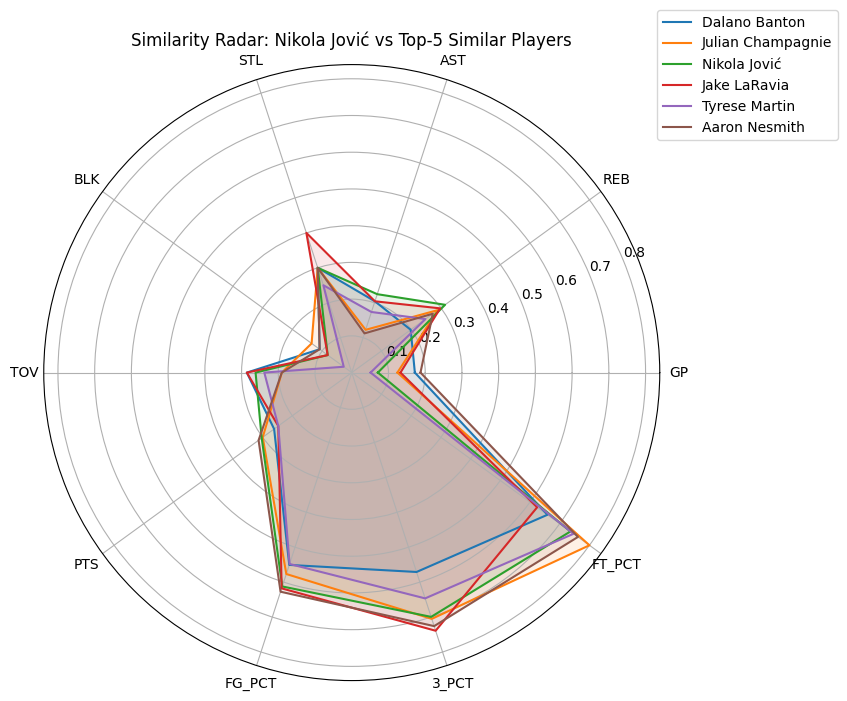

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def get_top_similar_players(df, target_player, stats, top_n=5):
    """
    Returns the top_n most similar players to target_player based on cosine similarity.
    """
    # Filter stats
    data = df[stats].copy()
    
    # Normalize stats manually (0-1 scale)
    data_norm = (data - data.min()) / (data.max() - data.min())
    
    # Get target player's vector
    target_vector = data_norm[df['PlayerName'] == target_player].values[0]
    
    # Compute similarity for all players
    sims = []
    for i, row in data_norm.iterrows():
        player_name = df.loc[i, 'PlayerName']
        if player_name == target_player:
            continue
        sim = cosine_similarity(target_vector, row.values)
        sims.append((player_name, sim))
    
    # Sort descending
    sims.sort(key=lambda x: x[1], reverse=True)
    
    # Return top-N players
    top_players = [player for player, score in sims[:top_n]]
    return top_players

def plot_similarity_radar(df, target_player, stats, top_n=5):
    """
    Plots radar chart for target player and top-N most similar players automatically.
    """
    top_players = get_top_similar_players(df, target_player, stats, top_n)
    
    # Include target player at the start
    players_to_plot = [target_player] + top_players
    
    # Normalize stats
    df_plot = df[df['PlayerName'].isin(players_to_plot)].copy()
    df_norm = df_plot.copy()
    for stat in stats:
        df_norm[stat] = (df_plot[stat] - df[stat].min()) / (df[stat].max() - df[stat].min())
    
    # Radar chart setup
    labels = stats
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))
    
    plt.figure(figsize=(8, 8))
    
    for i, row in df_norm.iterrows():
        values = row[stats].tolist()
        values += values[:1]
        plt.polar(angles, values, label=row['PlayerName'])
        plt.fill(angles, values, alpha=0.1)
    
    plt.xticks(angles[:-1], labels)
    plt.title(f"Similarity Radar: {target_player} vs Top-{top_n} Similar Players")
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.show()
# Load career averages dataset
df = pd.read_csv("../Datasets/career_avgs.csv")
df = df.rename(columns={"PLAYER_NAME": "PlayerName"})

# Choose numeric stats to use for comparison
stats = ["GP","REB","AST","STL","BLK","TOV","PTS","FG_PCT","3_PCT","FT_PCT"]
plot_similarity_radar(df, target_player="Nikola Jović", stats=stats, top_n=5)





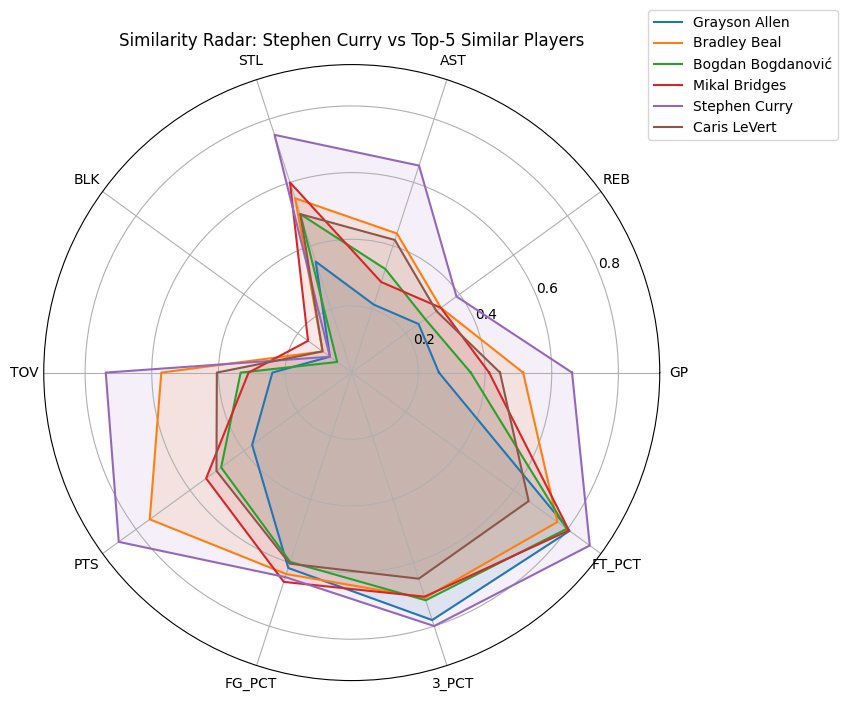

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def get_top_similar_players(df, target_player, stats, top_n=5):
    """
    Returns the top_n most similar players to target_player based on cosine similarity.
    """
    # Filter stats
    data = df[stats].copy()
    
    
    # Get target player's vector
    target_vector = data[df['PlayerName'] == target_player].values[0]
    
    # Compute similarity for all players
    sims = []
    for i, row in data.iterrows():
        player_name = df.loc[i, 'PlayerName']
        if player_name == target_player:
            continue
        sim = cosine_similarity(target_vector, row.values)
        sims.append((player_name, sim))
    
    # Sort descending
    sims.sort(key=lambda x: x[1], reverse=True)
    
    # Return top-N players
    top_players = [player for player, score in sims[:top_n]]
    return top_players

def plot_similarity_radar(df, target_player, stats, top_n=5):
    """
    Plots radar chart for target player and top-N most similar players automatically.
    """
    top_players = get_top_similar_players(df, target_player, stats, top_n)
    
    # Include target player at the start
    players_to_plot = [target_player] + top_players
    
    # Normalize stats
    df_plot = df[df['PlayerName'].isin(players_to_plot)].copy()
    df_norm = df_plot.copy()
    for stat in stats:
        df_norm[stat] = (df_plot[stat] - df[stat].min()) / (df[stat].max() - df[stat].min())
    # Radar chart setup
    labels = stats
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))
    
    plt.figure(figsize=(8, 8))
    
    for i, row in df_norm.iterrows():
        values = row[stats].tolist()
        values += values[:1]
        plt.polar(angles, values, label=row['PlayerName'])
        plt.fill(angles, values, alpha=0.1)
    
    plt.xticks(angles[:-1], labels)
    plt.title(f"Similarity Radar: {target_player} vs Top-{top_n} Similar Players")
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.show()
# Load career averages dataset
df = pd.read_csv("../Datasets/career_avgs.csv")
df = df.rename(columns={"PLAYER_NAME": "PlayerName"})

# Choose numeric stats to use for comparison
stats = ["GP","REB","AST","STL","BLK","TOV","PTS","FG_PCT","3_PCT","FT_PCT"]
plot_similarity_radar(df, target_player="Stephen Curry", stats=stats, top_n=5)



